In [1]:
#data handling/prediction
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [3]:
# read data into a DataFrame
data = pd.read_csv("/Users/ginachung/Desktop/airbnbdata.csv",index_col=0,encoding='latin-1')

In [4]:
data.head()
data.dtypes

survey_id                 int64
host_id                   int64
room_type                object
city                     object
borough                  object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                  int64
price                     int64
name                     object
property_type            object
last_modified            object
latitude                float64
longitude               float64
location                 object
dtype: object

In [5]:
data[data.isnull().any(axis=1)]

,survey_id,host_id,room_type,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,property_type,last_modified,latitude,longitude,location
room_id,,,,,,,,,,,,,,,,,
12988898,1438,71552588,Shared room,New York,Bronx,Fordham,0,0.0,3,1,130,NaN,Apartment,28:32.8,40.860324,-73.884933,0101000020E6100000AD8905BEA27852C061FBC9181F6E...
11260756,1438,58776581,Shared room,New York,Queens,Sunnyside,0,0.0,1,1,95,NaN,Apartment,28:27.0,40.741673,-73.925290,0101000020E610000037548CF3377B52C0C1A90F24EF5E...
4370230,1438,22686810,Entire home/apt,New York,Manhattan,Nolita,5,5.0,2,1,215,NaN,Apartment,44:01.9,40.720463,-73.995500,0101000020E6100000C1CAA145B67F52C0317DAF21385C...
9787590,1438,50448556,Entire home/apt,New York,Manhattan,Harlem,0,0.0,8,3,300,NaN,Apartment,19:11.9,40.803157,-73.951892,0101000020E6100000BD546CCCEB7C52C0D8463CD9CD66...
9325951,1438,33377685,Entire home/apt,New York,Manhattan,Hell's Kitchen,1,0.0,2,0,190,NaN,Apartment,29:41.0,40.764358,-73.985735,0101000020E610000072E14048167F52C0CE37A27BD661...
4629981,1438,1465519,Entire home/apt,New York,Manhattan,East Village,9,3.5,5,2,150,NaN,Apartment,52:53.3,40.724629,-73.982226,0101000020E6100000FAD170CADC7E52C0D95DA0A4C05C...
15709537,1438,10773304,Entire home/apt,New York,Manhattan,Lower East Side,14,5.0,2,1,110,NaN,Apartment,41:22.8,40.719827,-73.981958,0101000020E6100000EB025E66D87E52C08FE3874A235C...
9408391,1438,24338701,Private room,New York,Brooklyn,Williamsburg,0,0.0,2,1,100,NaN,Apartment,14:37.4,40.717869,-73.953960,0101000020E61000004C6C3EAE0D7D52C0F7E7A221E35B...
12797684,1438,69715276,Private room,New York,Manhattan,Upper West Side,0,0.0,1,1,100,NaN,Apartment,40:07.0,40.798433,-73.964039,0101000020E61000006344A2D0B27D52C00A86730D3366...


In [6]:
data["name"].value_counts()

Loft Suite @ The Box House Hotel                                                                       11
Private room                                                                                            9
CLEAN NEW YORK APT at Central Park                                                                      8
East Village Studio                                                                                     7
Private room in Brooklyn                                                                                7
Beautiful Private Room                                                                                  7
Cozy Rooms                                                                                              7
Upper East Side Studio                                                                                  6
Private Bedroom in Williamsburg                                                                         6
Private Room in Williamsburg Loft             

In [7]:
data = data.fillna({"name": "room for rent"})

In [8]:
data[data.isnull().any(axis=1)]

,survey_id,host_id,room_type,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,property_type,last_modified,latitude,longitude,location
room_id,,,,,,,,,,,,,,,,,


In [9]:
data["room_type"].value_counts()

Entire home/apt    20653
Private room       19509
Shared room         1082
Name: room_type, dtype: int64

In [10]:
data["type_entirehome"] = (data.room_type=='Entire home/apt').astype(int)
data["type_private"]=(data.room_type=='Private room').astype(int)

data["borough"] = data["borough"].astype('category')
data.dtypes

In [11]:
data["property_type"].value_counts()

Apartment             34911
House                  3605
Loft                    821
Townhouse               701
Condominium             518
Other                   211
Bed & Breakfast         166
Guesthouse               64
Timeshare                42
Hostel                   42
Guest suite              25
Dorm                     24
Boutique hotel           23
Villa                    22
Bungalow                 21
Serviced apartment       10
Vacation home            10
Boat                      6
Cabin                     4
Castle                    3
Earth House               3
Camper/RV                 3
Tent                      2
In-law                    2
Chalet                    2
Lighthouse                1
Casa particular           1
Cave                      1
Name: property_type, dtype: int64

data["borough_cat_code"] = data["borough"].cat.codes
data.head(200)

In [12]:
#dummy variables
data["borough_Bronx"] = (data.borough=='Bronx').astype(int)
data["borough_Manhattan"]=(data.borough=='Manhattan').astype(int)
data["borough_Brooklyn"] = (data.borough=='Brooklyn').astype(int)
data["borough_Queens"]=(data.borough=='Queens').astype(int)

In [13]:
data['property_type_Other'] = (data.property_type=='Other').astype(int)
data['property_type_Loft'] = (data.property_type=='Loft').astype(int)
data['property_type_Boat'] = (data.property_type=='Boat').astype(int)
data['property_type_Condominium'] = (data.property_type=='Condominium').astype(int)
data['property_type_Serviced apartment'] = (data.property_type=='Serviced apartment').astype(int)
data['property_type_Bed & Breakfast']= (data.property_type=='Bed & Breakfast').astype(int)
data['property_type_Boutique hotel']= (data.property_type=='Boutique hotel').astype(int)
data['property_type_Bungalow']= (data.property_type=='Bungalow').astype(int)
data['property_type_Camper/RV']= (data.property_type=='Camper/RV').astype(int)
data['property_type_Cabin']= (data.property_type=='Cabin').astype(int)
data['property_type_Castle']= (data.property_type=='Castle').astype(int)
data['property_type_Casa particular']= (data.property_type=='Casa particula').astype(int)
data['property_type_Cave']= (data.property_type=='Cave').astype(int)
data['property_type_Chalet']= (data.property_type=='Chalet').astype(int)
data['property_type_Dorm']= (data.property_type=='Dorm').astype(int)
data['property_type_Earth House']= (data.property_type=='Earth House').astype(int)
data['property_type_Guest suite']= (data.property_type=='Guest suite').astype(int)
data['property_type_Guesthouse']= (data.property_type=='Guesthouse').astype(int)
data['property_type_Hostel']= (data.property_type=='Hostel').astype(int)
data['property_type_In-law']= (data.property_type=='In-law').astype(int)
data['property_type_Tent']= (data.property_type=='Tent').astype(int)
data['property_type_Timeshare']= (data.property_type=='Timeshare').astype(int)
data['property_type_Townhouse']= (data.property_type=='Townhouse').astype(int)
data['property_type_Vacation home']= (data.property_type=='Vacation home').astype(int)
data['property_type_Villa']= (data.property_type=='Villa').astype(int)
data['property_type_House']= (data.property_type=='House').astype(int)

In [14]:
data["pricepp"]= data.price / data.accommodates

In [15]:
data["priceppx30"]=data.pricepp*30

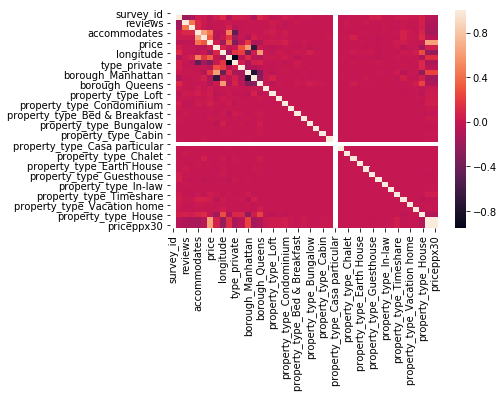

In [16]:
data[['pricepp','accommodates','reviews']].corr()
sns.heatmap(data.corr());

## Linear Regression 

In [17]:
#Linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
# create X and y 
X = data[['type_entirehome','type_private','borough_Manhattan','borough_Bronx','borough_Brooklyn',
          'borough_Queens', 'property_type_Other','property_type_Loft','property_type_House','property_type_Boat',
          'property_type_Condominium', 'property_type_Serviced apartment', 'property_type_Bed & Breakfast','property_type_Boutique hotel',
       'property_type_Bungalow','property_type_Camper/RV','property_type_Cabin','property_type_Castle','property_type_Casa particular',
        'property_type_Cave','property_type_Chalet','property_type_Dorm','property_type_Earth House','property_type_Guest suite',
       'property_type_Guesthouse','property_type_Hostel','property_type_In-law','property_type_Tent','property_type_Timeshare','property_type_Townhouse',
       'property_type_Vacation home','property_type_Villa']]
Y = data['pricepp']

# instantiate and fit 
multiple_linreg = LinearRegression()
multiple_linreg.fit(X, Y)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_
# print the coefficients 
print(intercept)
print(coeffs)

27.2160762709
[  1.35664852e+01   4.10076454e+00   2.62759949e+01   1.97834580e+00
   7.63001366e+00   3.39828157e+00   1.10112628e+01   1.16344621e+01
  -2.58137549e+00   9.88225284e+01   1.68774230e+01   4.74702304e+01
   4.79504249e+00   3.71221390e+01   2.76573070e+00  -2.12756028e+01
   5.31071018e+01   3.08537010e+01   8.88178420e-16   6.58742485e+00
  -8.29714807e-01  -8.16677021e+00   1.39820445e+01  -1.79216622e+00
  -1.09963226e+01   3.77101708e+00  -2.81384876e+00   4.63202852e+01
   5.15011656e+01  -2.64028441e+00  -1.65764257e-01   3.27061135e+00]


In [19]:
# pair the feature names with the coefficients
zip(X, multiple_linreg.coef_)

[('type_entirehome', 13.566485220146545),
 ('type_private', 4.1007645380347473),
 ('borough_Manhattan', 26.27599486474757),
 ('borough_Bronx', 1.9783457981786654),
 ('borough_Brooklyn', 7.6300136565178578),
 ('borough_Queens', 3.3982815656405823),
 ('property_type_Other', 11.011262844103005),
 ('property_type_Loft', 11.634462066356384),
 ('property_type_House', -2.5813754906032811),
 ('property_type_Boat', 98.822528386591756),
 ('property_type_Condominium', 16.877423024309465),
 ('property_type_Serviced apartment', 47.470230429235372),
 ('property_type_Bed & Breakfast', 4.7950424868013757),
 ('property_type_Boutique hotel', 37.122139004678729),
 ('property_type_Bungalow', 2.7657306953960994),
 ('property_type_Camper/RV', -21.275602829318974),
 ('property_type_Cabin', 53.107101769321076),
 ('property_type_Castle', 30.853701042728861),
 ('property_type_Casa particular', 8.8817841970012523e-16),
 ('property_type_Cave', 6.5874248524325578),
 ('property_type_Chalet', -0.8297148065111638),
 

In [20]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=20)
print("training data size:",X_train.shape)
print("testing data size:",X_test.shape)

('training data size:', (28870, 32))
('testing data size:', (12374, 32))


In [21]:
#train on training set
mult_linreg2 = LinearRegression()
mult_linreg2.fit(X_train, Y_train)

#generate predictions on training set and evaluate
Y_mult_pred_train = mult_linreg2.predict(X_train)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(Y_train, Y_mult_pred_train)))

#generate predictions on test set and evaluate
Y_mult_pred_test = mult_linreg2.predict(X_test)
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, Y_mult_pred_test)))

('Training set RMSE:', 42.463531832930187)
('Test set RMSE:', 46.264048216451847)


In [22]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print("training data size:",X_train.shape)
print("testing data size:",X_test.shape)

('training data size:', (32995, 32))
('testing data size:', (8249, 32))


In [23]:
#train on training set
mult_linreg2 = LinearRegression()
mult_linreg2.fit(X_train, Y_train)

#generate predictions on training set and evaluate
Y_mult_pred_train = mult_linreg2.predict(X_train)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(Y_train, Y_mult_pred_train)))

#generate predictions on test set and evaluate
Y_mult_pred_test = mult_linreg2.predict(X_test)
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, Y_mult_pred_test)))

('Training set RMSE:', 43.823345839131449)
('Test set RMSE:', 42.883268699531818)


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import StringIO
from sklearn.tree import export_graphviz

Decision Tree RMSE: 41.9668192109


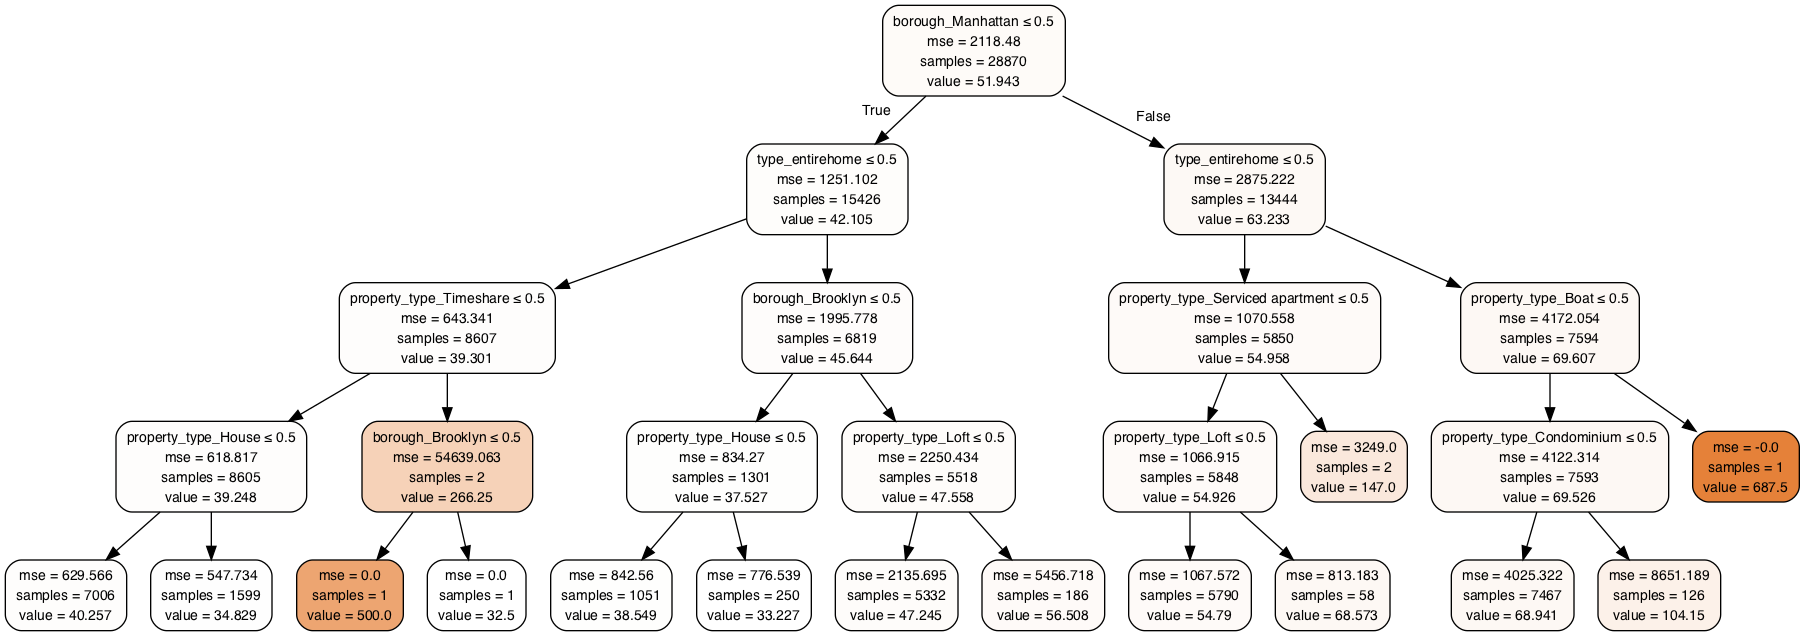

In [29]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
#features = [x.encode('utf-8') for x in model_df.columns.values]
fix_encoding = lambda s: s.decode('utf8', 'ignore')
decision_tree = DecisionTreeRegressor(max_depth=4)
decision_tree.fit(X_train,Y_train)
print "Decision Tree RMSE:",np.sqrt(
    mean_squared_error(Y_test,decision_tree.predict(X_test)))

dot_data =  StringIO.StringIO() 
export_graphviz(decision_tree, out_file=dot_data, 
                    feature_names=X_train.columns.tolist(), 
                    filled=True, rounded=True, 
                    special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

Decision Tree RMSE: 44.90962092


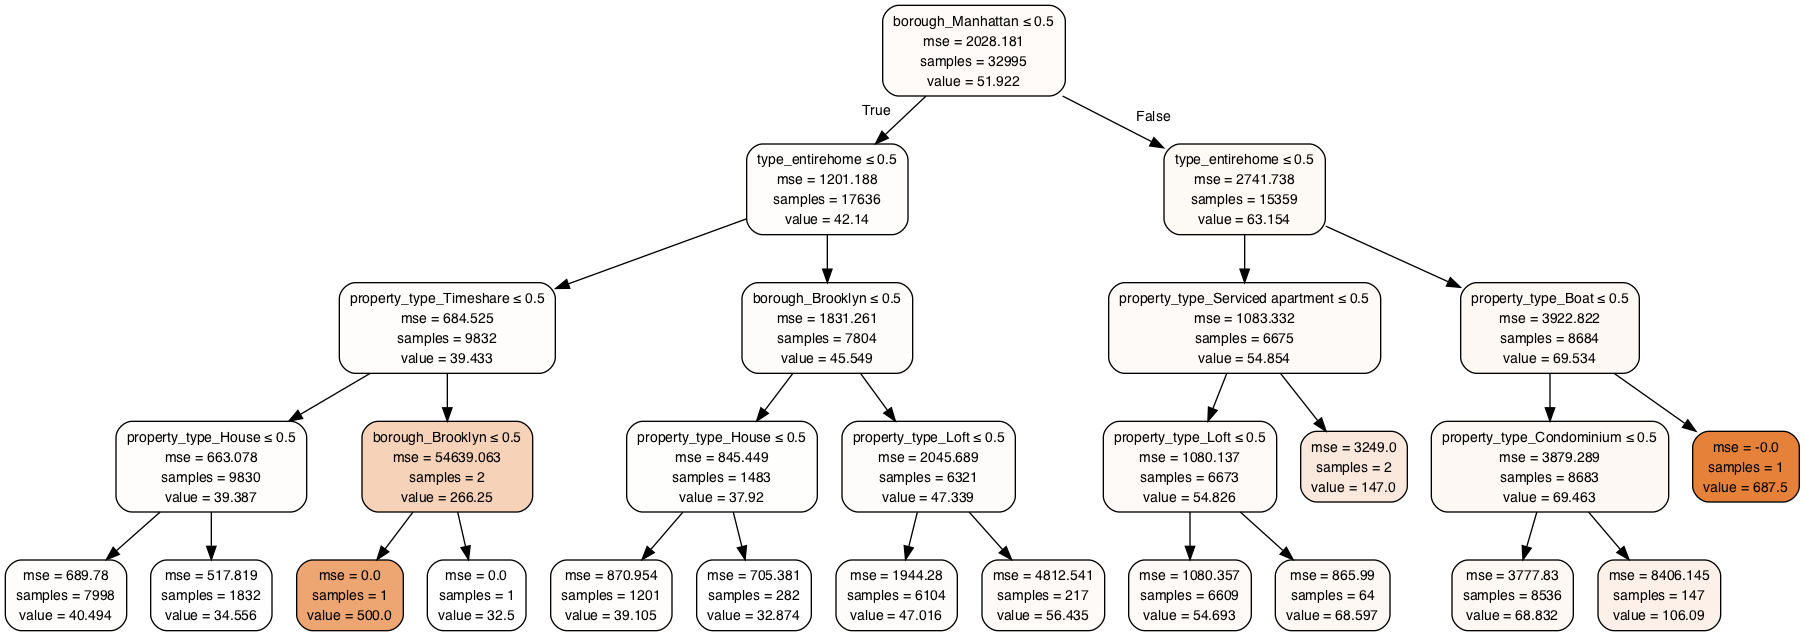

In [30]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
#features = [x.encode('utf-8') for x in model_df.columns.values]
fix_encoding = lambda s: s.decode('utf8', 'ignore')
decision_tree = DecisionTreeRegressor(max_depth=4)
decision_tree.fit(X_train,Y_train)
print "Decision Tree RMSE:",np.sqrt(
    mean_squared_error(Y_test,decision_tree.predict(X_test)))

dot_data =  StringIO.StringIO() 
export_graphviz(decision_tree, out_file=dot_data, 
                    feature_names=X_train.columns.tolist(), 
                    filled=True, rounded=True, 
                    special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

Decision Tree RMSE: 50.2994626468


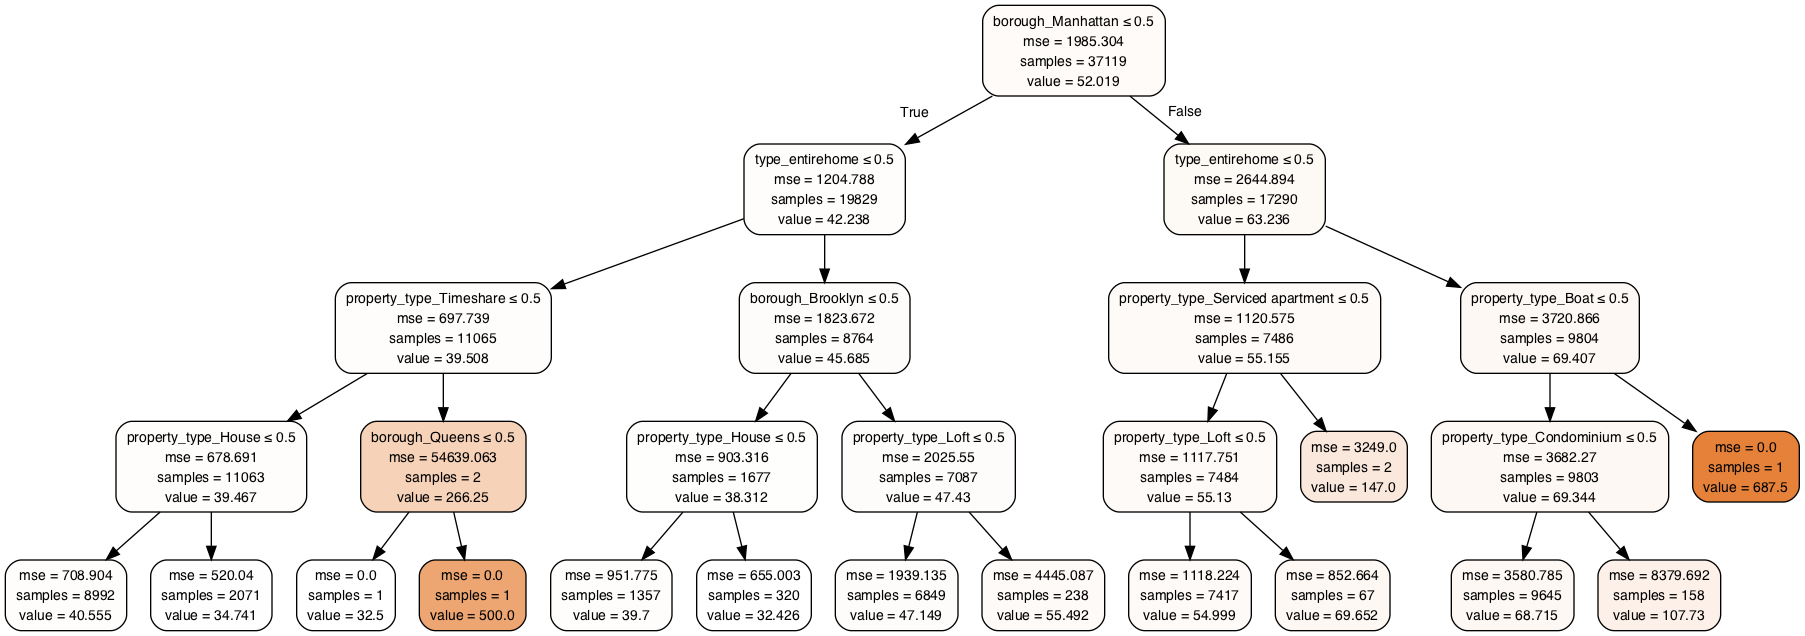

In [31]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)
#features = [x.encode('utf-8') for x in model_df.columns.values]
fix_encoding = lambda s: s.decode('utf8', 'ignore')
decision_tree = DecisionTreeRegressor(max_depth=4)
decision_tree.fit(X_train,Y_train)
print "Decision Tree RMSE:",np.sqrt(
    mean_squared_error(Y_test,decision_tree.predict(X_test)))

dot_data =  StringIO.StringIO() 
export_graphviz(decision_tree, out_file=dot_data, 
                    feature_names=X_train.columns.tolist(), 
                    filled=True, rounded=True, 
                    special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# See the map plot of all the listings

/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


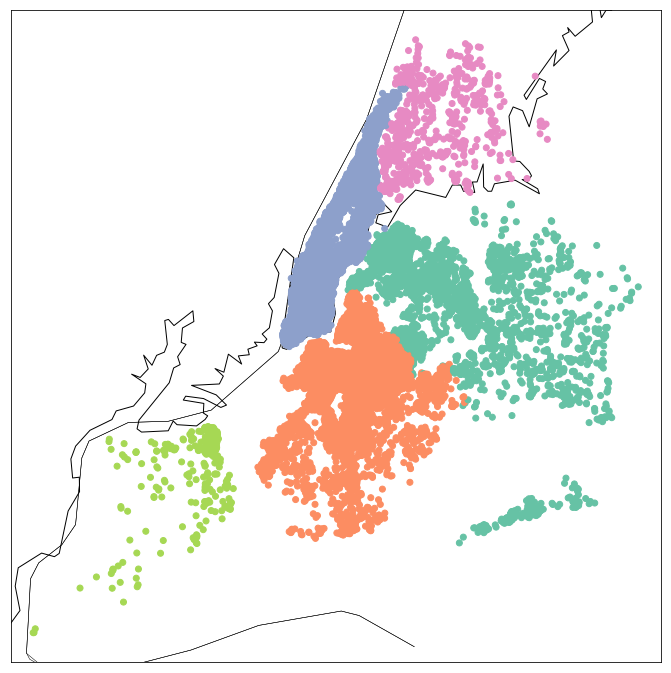

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
map = Basemap()

# decide map range based on min and max latitude/longitudes
margin = .02
lat_min = min(data['latitude'].values) - margin
lat_max = max(data['latitude'].values) + margin
lon_min = min(data['longitude'].values) - margin
lon_max = max(data['longitude'].values) + margin

# create map
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max - lon_min)/2,
            projection='merc',
            resolution='h',
            area_thresh=10000.)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.drawmapboundary(fill_color='#46bcec')
#plt.figure(figsize=(1, 1)) 
#m.fillcontinents(color='white', lake_color='#46bcec')
lons, lats = m(data['longitude'].values, data['latitude'].values)

# plot points colored by neighborhood
#col = business_df['neighborhood'].replace({u'': 'b'})
color_labels = data['borough'].unique()
rgb_values = sns.color_palette("Set2", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))
m.scatter(lons, lats, marker='o', c=data['borough'].map(color_map), zorder=5)
plt.show()

# See the distribution of Ratings

In [25]:
#remove 0 ratings from dataset
data = data[data.overall_satisfaction != 0]
data

,survey_id,host_id,room_type,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,...,property_type_Hostel,property_type_In-law,property_type_Tent,property_type_Timeshare,property_type_Townhouse,property_type_Vacation home,property_type_Villa,property_type_House,pricepp,priceppx30
room_id,,,,,,,,,,,,,,,,,,,,,
7739955,1438,38614070,Shared room,New York,Queens,Jackson Heights,6,5.0,4,1,...,0,0,0,0,0,0,0,1,21.250000,637.5
7383173,1438,32628813,Shared room,New York,Brooklyn,Cypress Hills,14,4.0,6,1,...,0,0,0,0,0,0,0,1,15.000000,450.0
10250852,1438,35553123,Shared room,New York,Brooklyn,Sheepshead Bay,3,4.5,6,1,...,0,0,0,0,0,0,0,0,39.833333,1195.0
2188359,1438,5029659,Shared room,New York,Manhattan,Hell's Kitchen,35,5.0,2,1,...,0,0,0,0,0,0,0,0,82.500000,2475.0
3120957,1438,8703,Shared room,New York,Manhattan,Harlem,8,5.0,2,1,...,0,0,0,0,0,0,0,0,55.000000,1650.0
1472002,1438,3003563,Shared room,New York,Manhattan,Theater District,12,4.5,2,1,...,0,0,0,0,0,0,0,0,55.000000,1650.0
15144508,1438,47666490,Shared room,New York,Manhattan,Hell's Kitchen,10,5.0,2,1,...,0,0,0,0,0,0,0,0,52.500000,1575.0
16274130,1438,28230496,Shared room,New York,Manhattan,East Village,22,4.5,2,1,...,0,0,0,0,0,0,0,0,58.500000,1755.0
16242765,1438,104177785,Shared room,New York,Queens,Jackson Heights,10,5.0,3,1,...,0,0,0,0,0,0,0,0,27.000000,810.0


/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


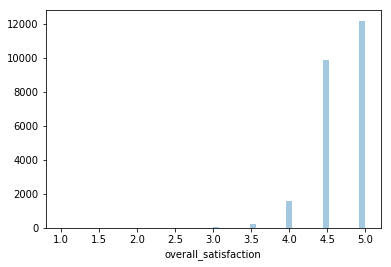

In [26]:
sns.distplot(data['overall_satisfaction'], kde=False);